In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hellocomsol import hellodata, arg_and_path

In [2]:
df = pd.read_csv('110nm_df.csv')
df.head()

,t,x,y,U,sr,thr,fn,fg
0,0.0,0.0,0.000004,0.035,9256.177,0.0,0.0,0.0045
1,0.1,0.0,0.000004,0.035,9266.522,0.0,0.0,0.0045
2,0.2,0.0,0.000004,0.035,9266.522,0.0,0.0,0.0045
3,0.3,0.0,0.000004,0.035,9266.522,0.0,0.0,0.0045
4,0.4,0.0,0.000004,0.035,9266.522,0.0,0.0,0.0045


In [9]:
df[(df['x'] > 5e-6) & (df['x'] < 6e-6)]['x'].unique()

array([5.0303097e-06, 5.6325766e-06, 5.8265896e-06, 5.9661510e-06])

In [17]:
at_x = df[(df['x'] == 5.0303097e-06) & (df['t'] == 5)]
at_x

,t,x,y,U,sr,thr,fn,fg
757,5.0,0.000005,0.000007,0.03968,1627.9669,1.181445e-34,2.957902e-19,0.0045


In [18]:
from scipy.interpolate import griddata

In [19]:
at_t = df[df['t'] == 10]
at_t.head()

,t,x,y,U,sr,thr,fn,fg
100,10.0,0.000000,0.000004,0.035000,9266.5220,0.000000e+00,0.000000e+00,0.0045
201,10.0,0.000000,0.000002,0.035000,10699.2580,0.000000e+00,0.000000e+00,0.0045
302,10.0,0.000004,0.000004,0.037585,3958.6292,-1.082157e-33,2.038737e-21,0.0045
403,10.0,0.000000,0.000048,0.035000,10850.2510,0.000000e+00,0.000000e+00,0.0045
504,10.0,0.000000,0.000044,0.035000,8254.2690,0.000000e+00,0.000000e+00,0.0045


In [64]:
grid_x, grid_y, int_data = hellodata.interpolate_values(at_t, variable='fn', inter_num=1000)

Text(0, 0.5, 'y, m')

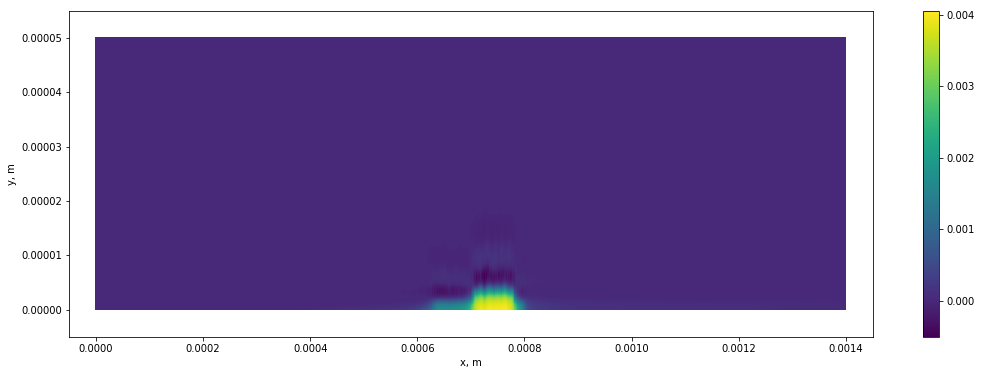

In [65]:
plt.figure(figsize=(18, 6))
plt.pcolormesh(grid_x, grid_y, int_data)
plt.colorbar()

plt.xlim(-5e-5, 145e-5)
plt.ylim(-5e-6, 55e-6)
plt.xlabel('x, m')
plt.ylabel('y, m')

In [54]:
X, Y = np.meshgrid(np.arange(4), np.arange(5))

In [55]:
Z = np.power(X+Y, 2)
Z

array([[ 0,  1,  4,  9],
       [ 1,  4,  9, 16],
       [ 4,  9, 16, 25],
       [ 9, 16, 25, 36],
       [16, 25, 36, 49]])

In [66]:
Y[:, 2]

array([0, 1, 2, 3, 4])

In [69]:
X[:, 2]

array([2, 2, 2, 2, 2])

In [51]:
Z[:,2]

array([ 4,  9, 16, 25, 36])

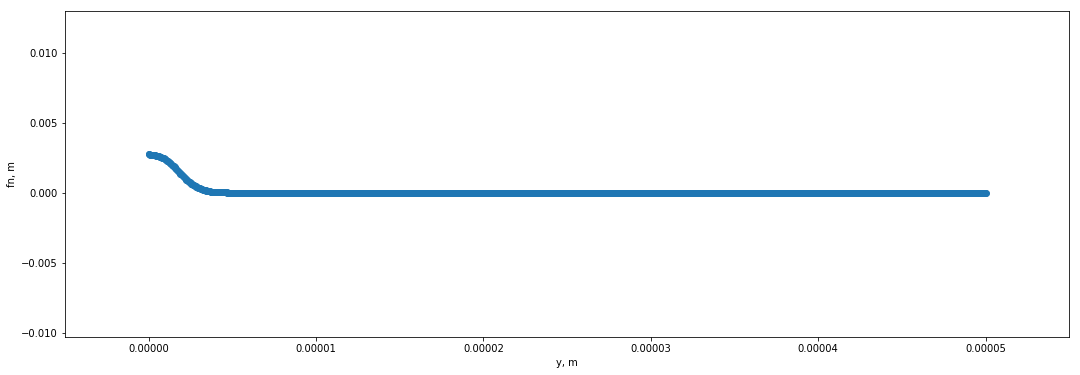

In [71]:
plt.figure(figsize=(18, 6))
plt.scatter(grid_y[:, 500], int_data[:, 500])
plt.xlim(-5e-6, 55e-6)
plt.xlabel('y, m')
plt.ylabel('fn, m')
plt.show()